In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
# Membaca File CSV mennggunakan Library Pandas
df = pd.read_csv("spam-dataset.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


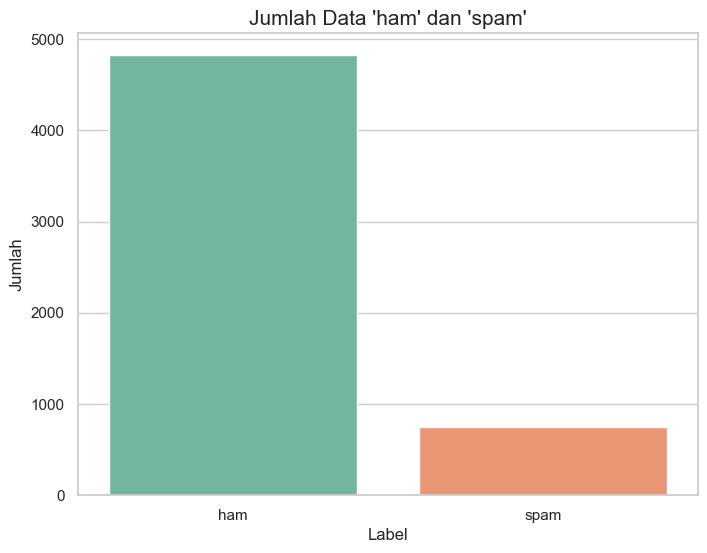

In [17]:
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6))

sns.countplot(x=df['label'], palette="Set2")

plt.xlabel("Label", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.title("Jumlah Data 'ham' dan 'spam'", fontsize=15)

plt.show()

In [18]:
# Menghitung rata-rata jumlah token dalam setiap kalimat dalam kolom 'Text'
avg_words_len = round(sum([len(i.split()) for i in df['Text']]) / len(df['Text']))
print(avg_words_len)

15


In [19]:
# Menghitung total jumlah kata unik dalam korpus teks
s = set()
for sent in df['Text']:
  for word in sent.split():
    s.add(word)

# Menghitung panjang total set 's', yang merepresentasikan jumlah kata unik dalam korpus
total_words_length = len(s)

# Mencetak jumlah kata unik ke layar
print(total_words_length)


15585


In [20]:
# Memisahkan data menjadi fitur (X) dan label (y)
X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])

# Membuat DataFrame baru dengan fitur 'Text' dan label 'label'
new_df = pd.DataFrame({'Text': X, 'label': y})

# Memisahkan data menjadi set pelatihan dan set pengujian dengan pembagian 80% data untuk pelatihan dan 20% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(
    new_df['Text'], new_df['label'], test_size=0.2, random_state=42)

# Menghitung ukuran dari set pelatihan dan set pengujian
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

In [21]:
MAXTOKENS=total_words_length
OUTPUTLEN=avg_words_len

In [22]:
# Tokenize and pad the input sequences
tokenizer = Tokenizer(num_words=MAXTOKENS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [23]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=OUTPUTLEN, padding='post', truncating='post')

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=OUTPUTLEN, padding='post', truncating='post')

In [24]:
# Build the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=MAXTOKENS, output_dim=64, input_length=OUTPUTLEN))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test))

Epoch 1/5
140/140 [==============================] - 12s 35ms/step - loss: 0.1848 - accuracy: 0.9399 - val_loss: 0.0908 - val_accuracy: 0.9704
Epoch 2/5
140/140 [==============================] - 3s 22ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0834 - val_accuracy: 0.9749
Epoch 3/5
140/140 [==============================] - 3s 22ms/step - loss: 0.0092 - accuracy: 0.9978 - val_loss: 0.0879 - val_accuracy: 0.9785
Epoch 4/5
140/140 [==============================] - 3s 22ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.1056 - val_accuracy: 0.9776
Epoch 5/5
140/140 [==============================] - 3s 22ms/step - loss: 6.4050e-04 - accuracy: 1.0000 - val_loss: 0.1035 - val_accuracy: 0.9740


In [25]:
# Evaluate the model
accuracy = model.evaluate(X_test_pad, y_test)[1]
print(f"Accuracy: {accuracy}")

35/35 [==============================] - 0s 6ms/step - loss: 0.1035 - accuracy: 0.9740
Accuracy: 0.9739910364151001


In [26]:
# Make predictions on a sample sentence
sample_sentence = 'This is a Message'
sample_seq = tokenizer.texts_to_sequences([sample_sentence])
sample_pad = pad_sequences(sample_seq, maxlen=OUTPUTLEN, padding='post', truncating='post')

In [27]:
prediction = model.predict(sample_pad)
print(f"Predicted Probability: {prediction[0][0]}")

1/1 [==============================] - 1s 1s/step
Predicted Probability: 0.00012081633758498356
